Amdahl’s law states that if  denotes the time required to solve a problem on  processors and if  is the fraction of the algorithm that is parallelizable, then

(a)	Derive a formula for the maximum theoretical speedup possible on a machine with infinite processors.  

As n goes to infinity, pT(n)/n goes almost to zero, so this term becomes negligible.  We then are left with
T(n) is roughly (1-p)T(1) (equivalent to sequential computation).

Maximum theoretical speedup possible: T(1)/(1-p)T(1) = 1/(1-p)
 

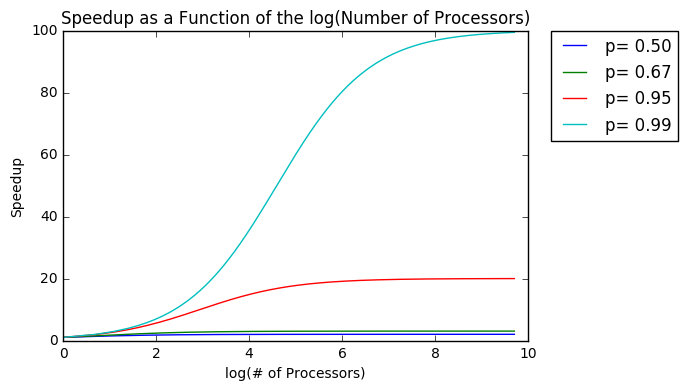

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def speedup(p):
     
    y_values = []
    T1 = 100
    x = np.linspace(1, 16384, 16384)
     
    
    for i in x:
        time = ((1-p)*T1)+(p*T1/i)
        y_values.append(T1/time)
         
        
    x=np.log(x)
    plt.plot(x,y_values,label="p= %3.2f" % (p)) 
     
    
for pct_parallel in (0.5, 0.67, 0.95,0.99):
    speedup(pct_parallel)

plt.title('Speedup as a Function of the log(Number of Processors)')
plt.ylabel('Speedup')
plt.xlabel('log(# of Processors)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.show()
    

In [9]:
import time
import sys
import multiprocessing as mp

# initial conditions
y = mp.Array('d', 1000, lock=False)
 

# time-step
dt = 0.01

def advance(dt):
	global y
	n = len(y)
	new_y = list(y)
	for j in xrange(n):
		new_y[j] += dt * (20 * (y[j - 1] - 2 * y[j] + y[(j + 1) % n])
						   - y[j] * (1 - y[j]) * (0.3 - y[j]))
	y = new_y
    
 
    
def f(i):
    advance(dt)
    print i * dt

if __name__ == '__main__':
    num_processes=16
    process_pool = mp.Pool(num_processes)
 
    results = process_pool.map(f,[(i) for i in range(1,10001)])

 



SyntaxError: invalid syntax (<ipython-input-9-72086966878f>, line 36)